In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv")

print("=== Dataset Info ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Duplicate Rows ===")
print(df.duplicated().sum())

print("\n=== Descriptive Statistics ===")
print(df.describe())

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # handle bad formats
print("\n=== Check Date Conversion ===")
print(df['Date'].head())

df_clean = df.dropna()
print(f"\n Cleaned dataset shape: {df_clean.shape}")

print("\n=== Null values after cleaning ===")
print(df_clean.isnull().sum())

df_clean = df_clean.sort_values('Date')

print("\n=== Preview Cleaned Data ===")
print(df_clean.head())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None

=== Missing Values ===
Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

=== Duplicate Rows ===
0

=== Descriptive Statistics ===
        Local Route    Light Rail  Peak Service   Rapid Route       School  \
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000   
mean    9891.395203   7195.446298

Insight 1: Total Passengers per Service Type
Local Route     18971696
Light Rail      13800866
Peak Service      344437
Rapid Route     24161455
School           4512469
dtype: int64


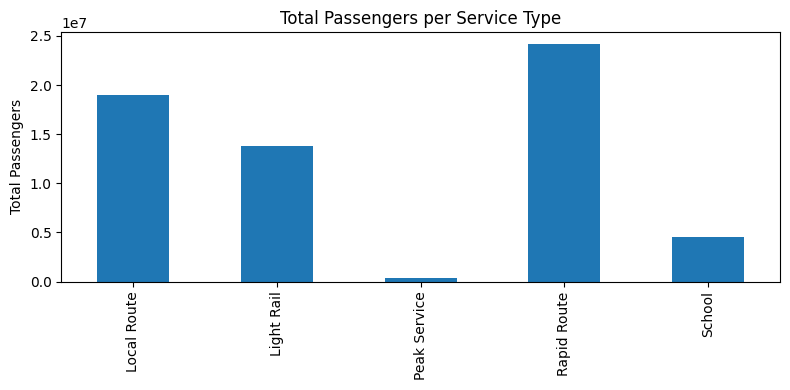


Insight 2: Average Daily Passengers per Service
Local Route      9891.395203
Light Rail       7195.446298
Peak Service      179.581335
Rapid Route     12597.213243
School           2352.694995
dtype: float64

Insight 3: Daily Trend for Each Service (line plot)


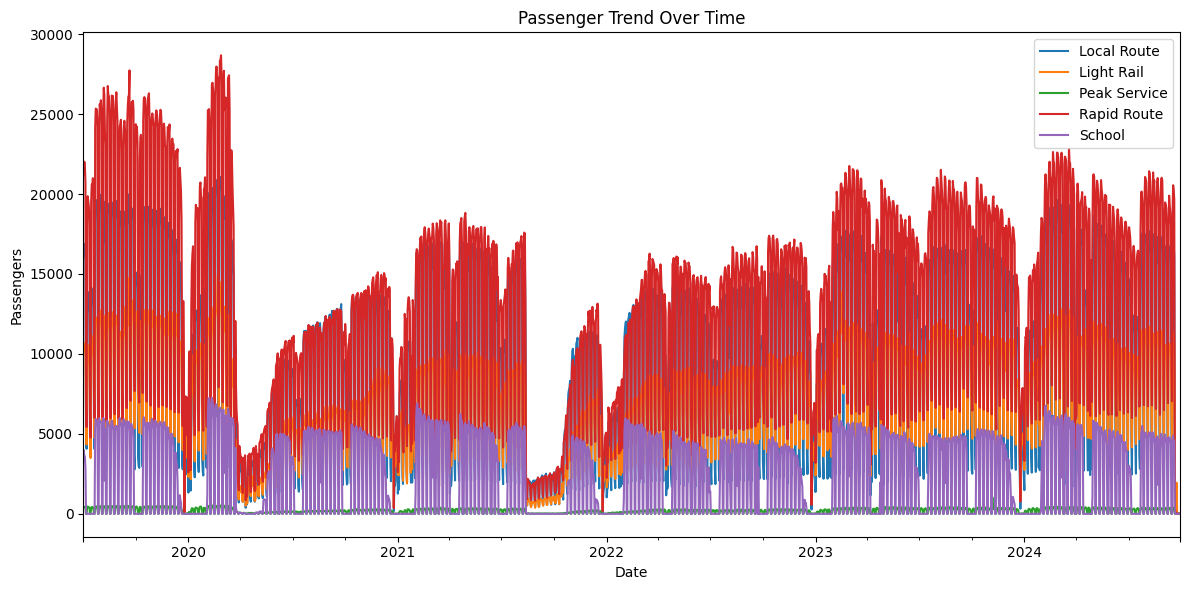


Insight 4: Peak Day for Total Passengers
Date: 2020-02-27, Total Passengers: 69752

Insight 5: Correlation between Service Types
              Local Route  Light Rail  Peak Service  Rapid Route    School
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290
School           0.852356    0.685795      0.728795     0.754290  1.000000


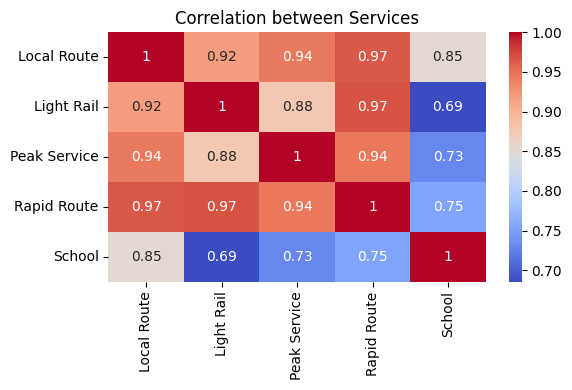

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

total_journeys = df[services].sum()
print("Insight 1: Total Passengers per Service Type")
print(total_journeys)

total_journeys.plot(kind='bar', title="Total Passengers per Service Type", ylabel="Total Passengers", figsize=(8, 4))
plt.tight_layout()
plt.show()

avg_daily = df[services].mean()
print("\nInsight 2: Average Daily Passengers per Service")
print(avg_daily)

print("\nInsight 3: Daily Trend for Each Service (line plot)")
df.set_index('Date')[services].plot(figsize=(12, 6), title="Passenger Trend Over Time")
plt.ylabel("Passengers")
plt.tight_layout()
plt.show()

df['Total'] = df[services].sum(axis=1)
max_day = df.loc[df['Total'].idxmax()]
print(f"\nInsight 4: Peak Day for Total Passengers\nDate: {max_day['Date'].date()}, Total Passengers: {int(max_day['Total'])}")

correlation = df[services].corr()
print("\nInsight 5: Correlation between Service Types")
print(correlation)

import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Services")
plt.tight_layout()
plt.show()


In [6]:
pip install Prophet


Forecasting for: Local Route


DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/icem_vi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/cq5_ki5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33124', 'data', 'file=/tmp/tmpv4we7sxn/icem_vi5.json', 'init=/tmp/tmpv4we7sxn/cq5_ki5b.json', 'output', 'file=/tmp/tmpv4we7sxn/prophet_modelixgexm4s/prophet_model-20250526053031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


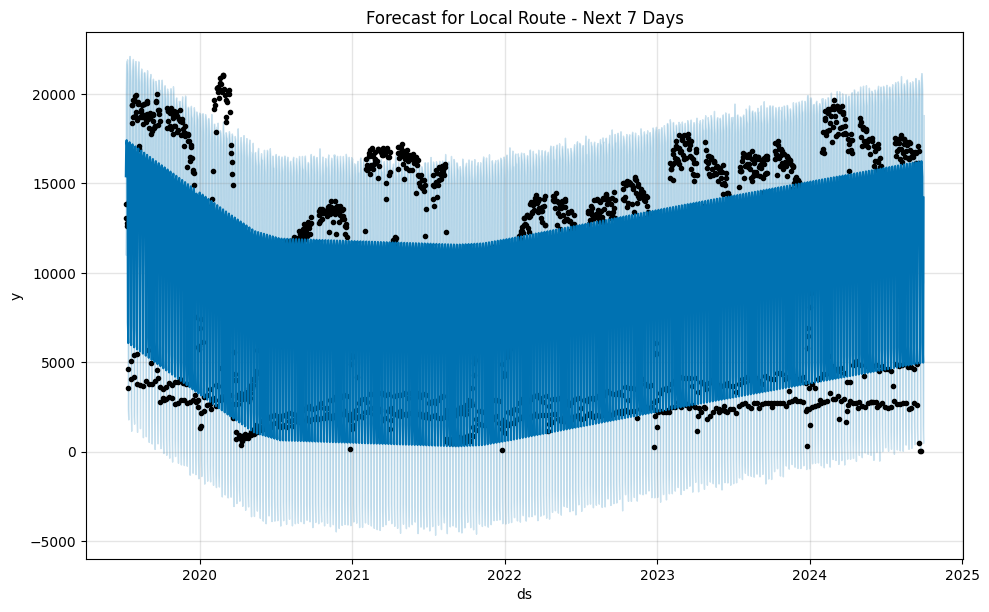

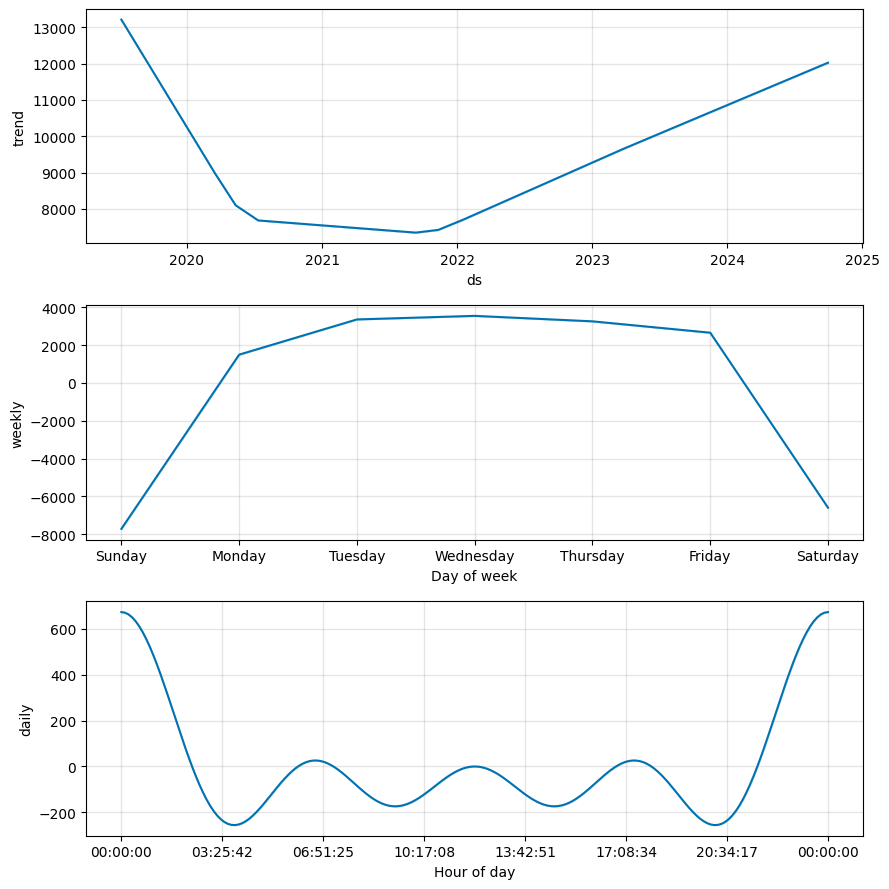

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/7385wge0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/3jcd3160.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35616', 'data', 'file=/tmp/tmpv4we7sxn/7385wge0.json', 'init=/tmp/tmpv4we7sxn/3jcd3160.json', 'output', 'file=/tmp/tmpv4we7sxn/prophet_model7_5yv9ek/prophet_model-20250526053034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Forecasting for: Light Rail


05:30:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


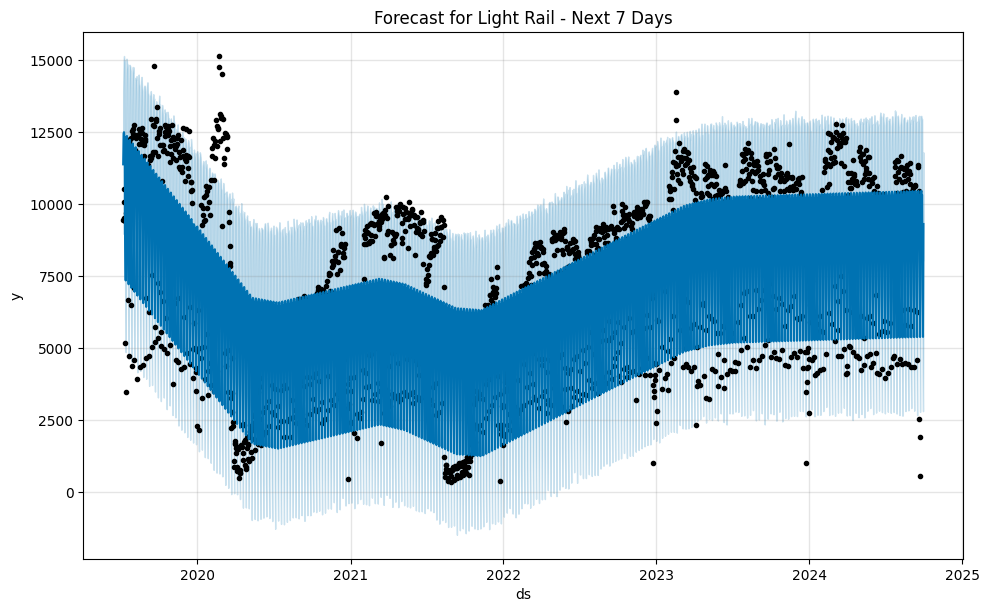

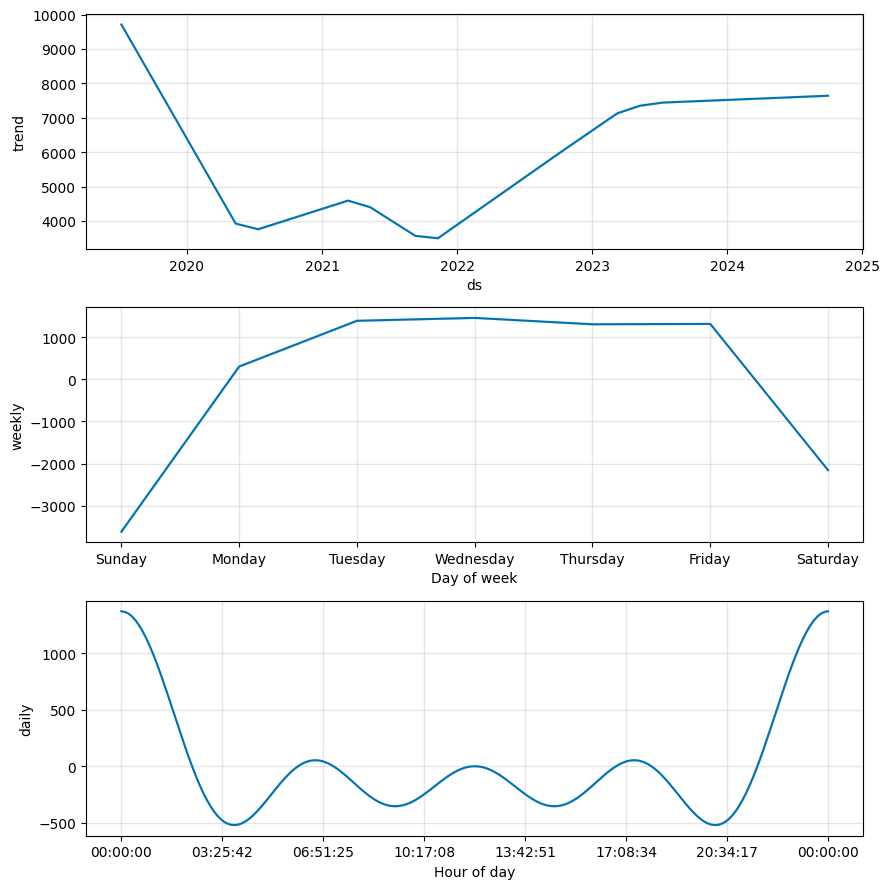

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/7rs_8wcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/mxaravek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59048', 'data', 'file=/tmp/tmpv4we7sxn/7rs_8wcl.json', 'init=/tmp/tmpv4we7sxn/mxaravek.json', 'output', 'file=/tmp/tmpv4we7sxn/prophet_modelgovc63s6/prophet_model-20250526053036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Forecasting for: Peak Service


05:30:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


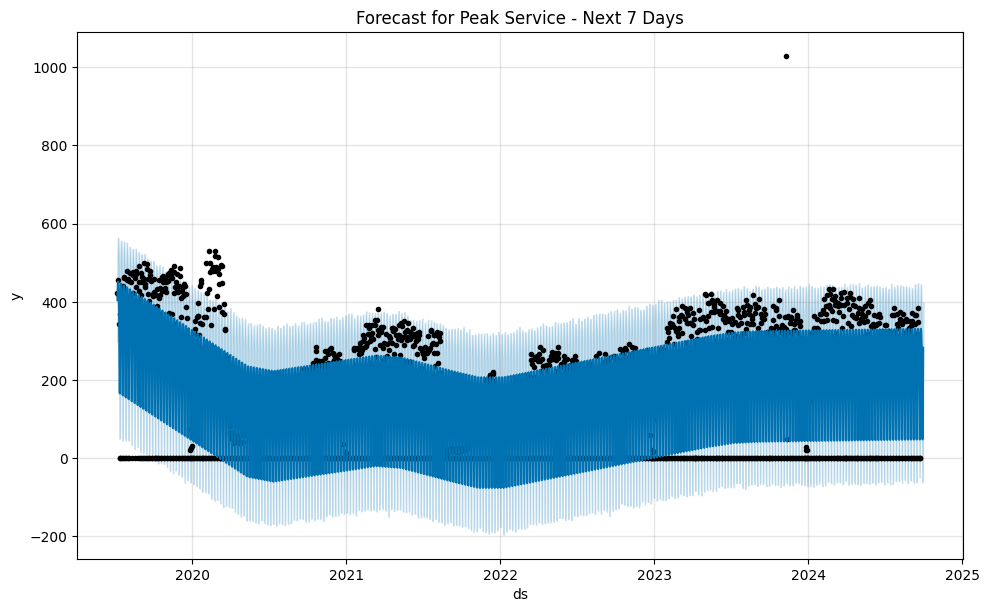

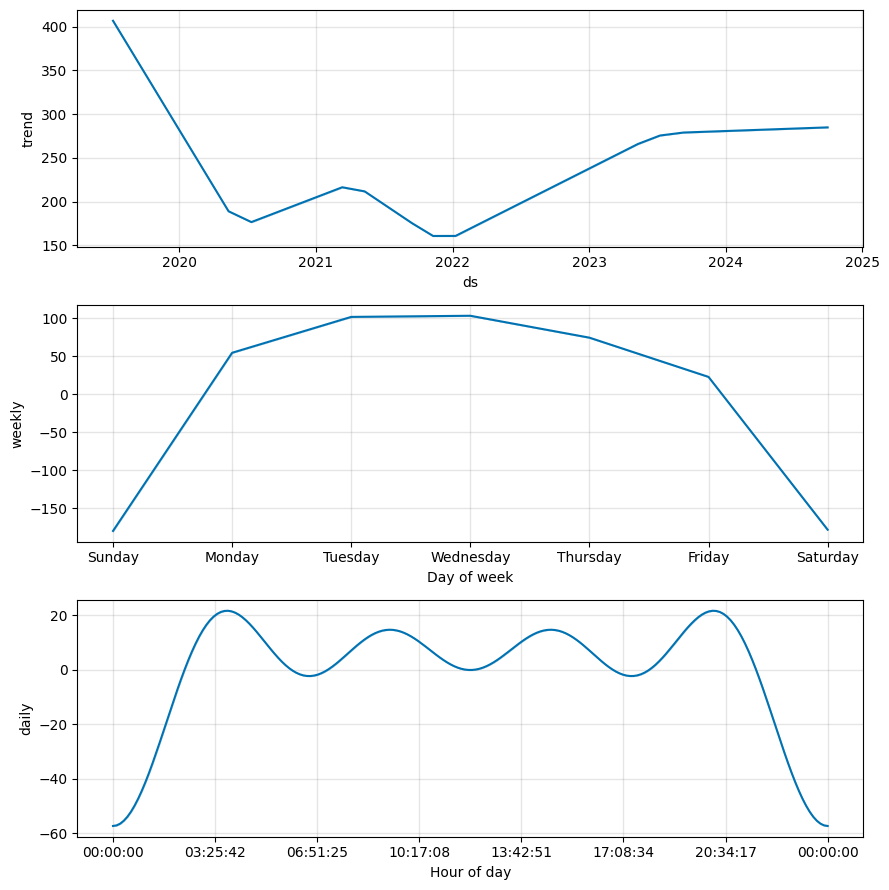

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/8gvg34_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/6d1evi7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1376', 'data', 'file=/tmp/tmpv4we7sxn/8gvg34_o.json', 'init=/tmp/tmpv4we7sxn/6d1evi7z.json', 'output', 'file=/tmp/tmpv4we7sxn/prophet_modelllqrr33s/prophet_model-20250526053038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Forecasting for: Rapid Route


05:30:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


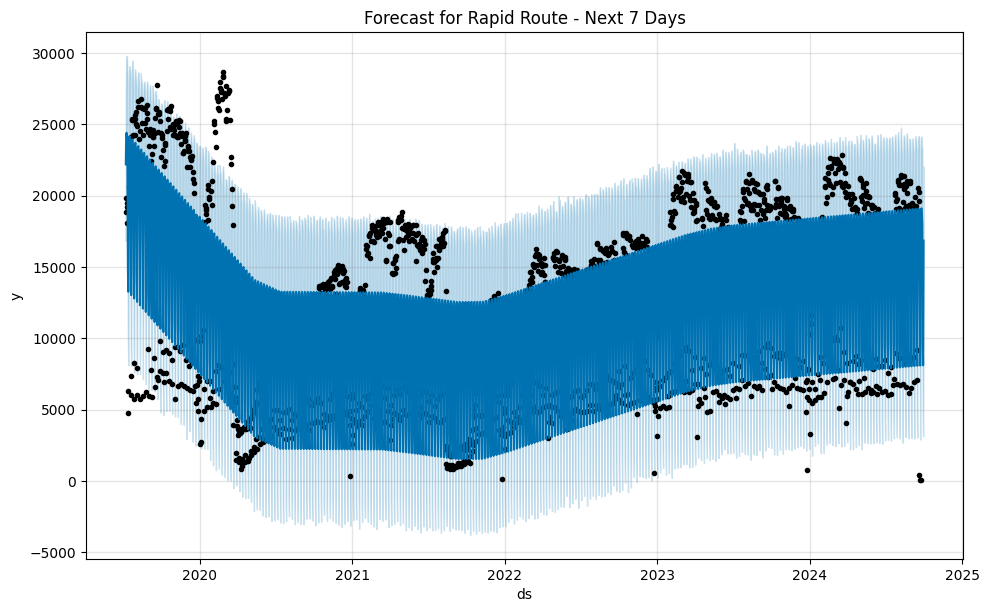

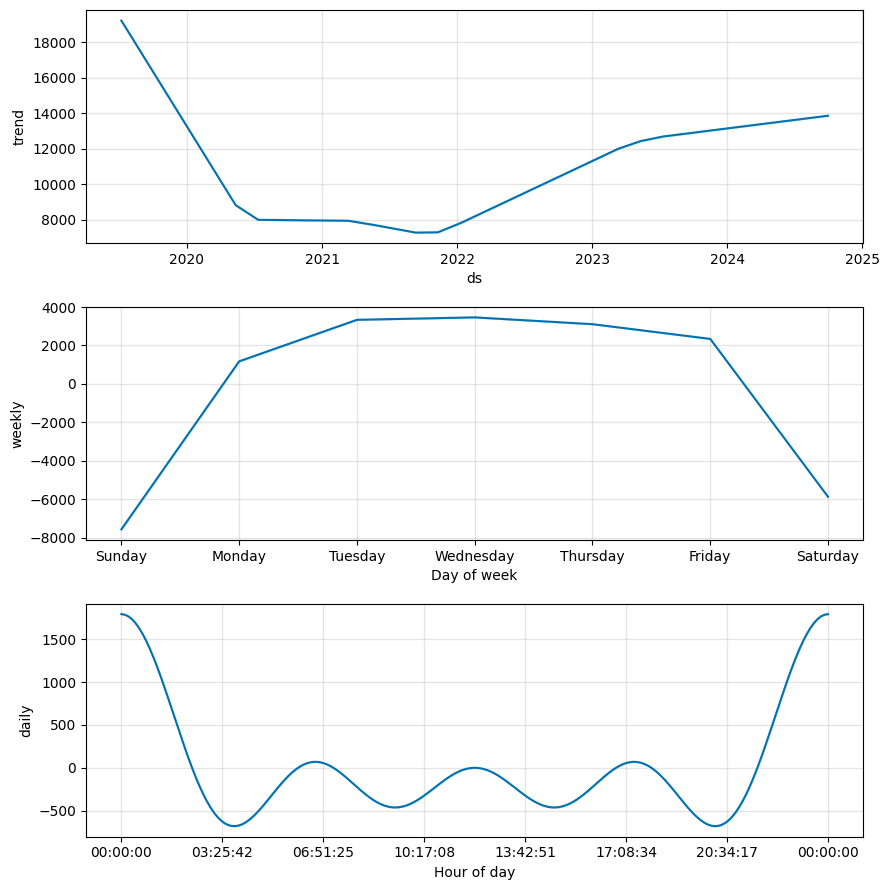

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/n8ri1wja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv4we7sxn/gqfecxbp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57782', 'data', 'file=/tmp/tmpv4we7sxn/n8ri1wja.json', 'init=/tmp/tmpv4we7sxn/gqfecxbp.json', 'output', 'file=/tmp/tmpv4we7sxn/prophet_modeldlsuhfkh/prophet_model-20250526053039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Forecasting for: School


05:30:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


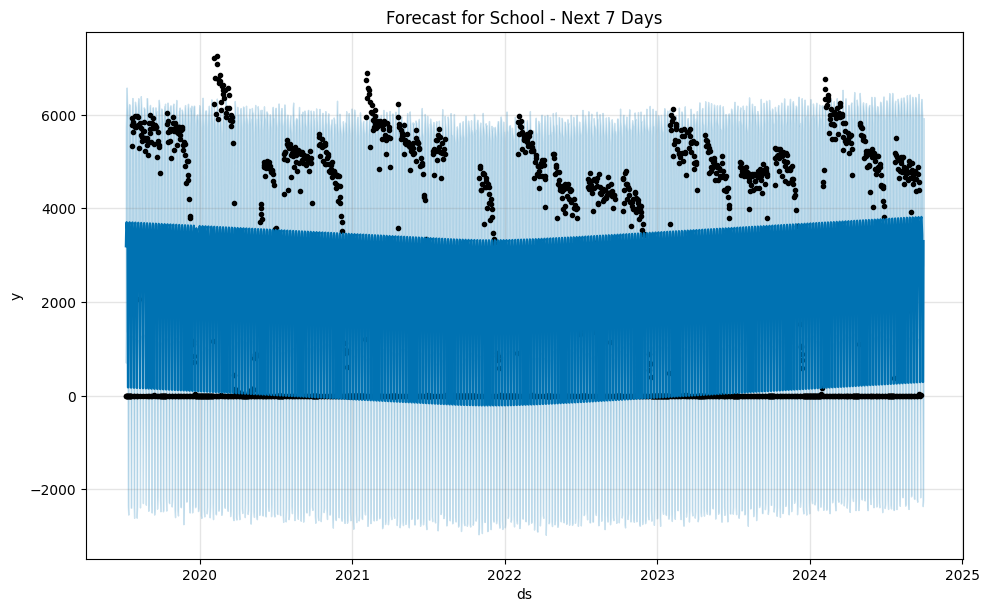

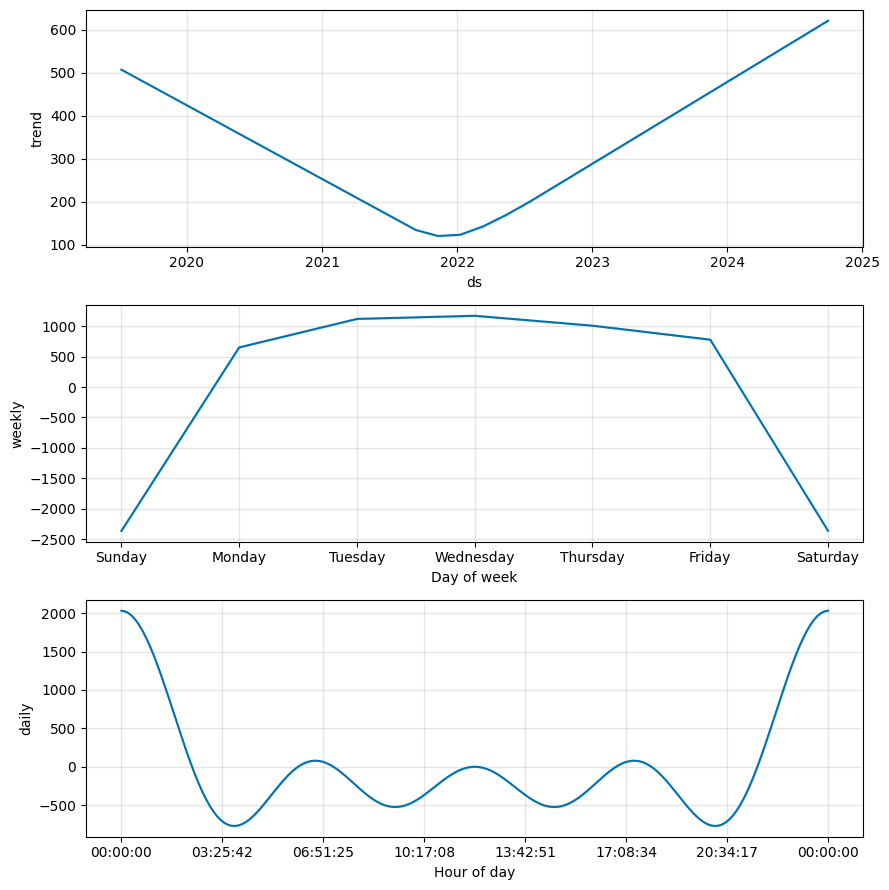

In [7]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

forecast_results = {}

for service in services:
    print(f"\nForecasting for: {service}")

    df_service = df_clean[['Date', service]].rename(columns={'Date': 'ds', service: 'y'})

    df_service['y'] = df_service['y'].fillna(0).clip(lower=0)

    model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=True)
    model.fit(df_service)

    future = model.make_future_dataframe(periods=7)

    forecast = model.predict(future)

    forecast_results[service] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    model.plot(forecast)
    plt.title(f'Forecast for {service} - Next 7 Days')
    plt.show()

    model.plot_components(forecast)
    plt.show()
